In [ ]:
# importi
import sys
!{sys.executable} -m pip install pyeasyga

import random
import numpy as np
import math # Za Rastriginovu funkciju
from pyeasyga.pyeasyga import GeneticAlgorithm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

print("pyeasyga i ostale biblioteke su spremne.")

  Preparing metadata (setup.py) ... done
  Created wheel for pyeasyga: filename=pyeasyga-0.3.1-py2.py3-none-any.whl size=6784 sha256=dc069d65e0cb8b9251d777d398f05cb76edcd7ba36431585ccf53dba8cc3a607
  Stored in directory: /root/.cache/pip/wheels/62/dc/8e/1f2f52b623874fe87032642a8fc1f64a2175fd26d77c95b469
Successfully built pyeasyga
pyeasyga i ostale biblioteke su spremne.


In [ ]:
# Prerequisits
# Definicija Rastriginove funkcije
# f(x1, x2) = 20 + x1^2 + x2^2 – 10(cos(2πx1) + cos(2πx2))
# Minimum je f(0,0) = 0
# Opseg: x1, x2 ∈ [-5.12, 5.12]
def rastrigin_function(x):
    x1, x2 = x
    return 20 + x1**2 + x2**2 - 10 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))

# Parametri za GA (mogu se mijenjati po podzadacima)
# Početna dužina hromosoma (npr. 13 bita po varijabli, ukupno 26)
# Ovo je više nego u Drop-Wave primjeru (koji je bio 26 za dvije varijable)
# Korigovat ćemo ovo u podzadatku 1.b
BINARY_CHROMOSOME_LENGTH_PER_VAR = 13 # Bita po varijabli
TOTAL_BINARY_CHROMOSOME_LENGTH = 2 * BINARY_CHROMOSOME_LENGTH_PER_VAR

# Opseg pretrage za x1 i x2
RASTRIGIN_RANGE = np.array([[-5.12, 5.12], [-5.12, 5.12]])

# Funkcija za kreiranje jedinke (hromosoma)
def create_individual_rastrigin(data): # data ovdje nije korištena za inicijalizaciju
    return [random.randint(0, 1) for _ in range(TOTAL_BINARY_CHROMOSOME_LENGTH)]

# Funkcija za konverziju binarnog niza u decimalni broj
def binary_to_decimal(binary_list):
    decimal_value = 0
    for bit in binary_list:
        decimal_value = (decimal_value << 1) | bit
    return decimal_value

# Funkcija za dekodiranje hromosoma u realne vrijednosti x1, x2
def decode_rastrigin(individual):
    mid_point = TOTAL_BINARY_CHROMOSOME_LENGTH // 2
    x1_binary = individual[:mid_point]
    x2_binary = individual[mid_point:]

    # Dekodiranje x1
    max_decimal_val_var = 2**len(x1_binary) - 1
    x1_decimal = binary_to_decimal(x1_binary)
    x1_real = RASTRIGIN_RANGE[0][0] + (x1_decimal / max_decimal_val_var) * (RASTRIGIN_RANGE[0][1] - RASTRIGIN_RANGE[0][0])

    # Dekodiranje x2
    max_decimal_val_var = 2**len(x2_binary) - 1
    x2_decimal = binary_to_decimal(x2_binary)
    x2_real = RASTRIGIN_RANGE[1][0] + (x2_decimal / max_decimal_val_var) * (RASTRIGIN_RANGE[1][1] - RASTRIGIN_RANGE[1][0])

    return [x1_real, x2_real]

# Fitness funkcija (cilj je minimizacija Rastriginove funkcije)
# data je ovdje sama Rastriginova funkcija
def fitness_rastrigin(individual, data_func):
    decoded_values = decode_rastrigin(individual)
    # Petlja da osiguramo da su dekodirane vrijednosti unutar opsega (za svaki slučaj, mada dekodiranje treba to da osigura)
    # U praksi, pyeasyga ne koristi data za generisanje novih jedinki ako su van opsega,
    # ali je dobra praksa da fitness funkcija vraća validne vrijednosti.
    # Za ovaj primjer, decode_rastrigin bi uvijek trebao vratiti vrijednosti unutar opsega.
    return data_func(decoded_values)


# Operatori ukrštanja i mutacije (iz primjera u dokumentu)
# Dvotačkasto ukrštanje
def crossover_two_point(parent_1, parent_2):
    if len(parent_1) < 2: # Zaštita ako je hromosom prekratak
        return parent_1, parent_2
    idx1 = random.randrange(1, len(parent_1) -1) # -1 da osiguramo da idx2 može biti veći
    idx2 = random.randrange(idx1 + 1, len(parent_1)) # osiguravamo idx2 > idx1

    child_1 = parent_1[:idx1] + parent_2[idx1:idx2] + parent_1[idx2:]
    child_2 = parent_2[:idx1] + parent_1[idx1:idx2] + parent_2[idx2:]
    return child_1, child_2

# Mutacija (negacija bita na nasumičnoj lokaciji)
def mutate_bit_flip(individual):
    mutate_index = random.randrange(len(individual))
    individual[mutate_index] = 1 - individual[mutate_index] # Flip bit (0->1, 1->0)
    return individual

# Inicijalizacija GA objekta (osnovni parametri)
# seed_data je funkcija koju optimiziramo
ga_rastrigin = GeneticAlgorithm(seed_data=rastrigin_function,
                                population_size=50,
                                generations=100,
                                crossover_probability=0.8,
                                mutation_probability=0.05, # Malo veća od primjera u dok.
                                elitism=True,
                                maximise_fitness=False) # Minimiziramo Rastriginovu funkciju

ga_rastrigin.create_individual = create_individual_rastrigin
ga_rastrigin.crossover_function = crossover_two_point
ga_rastrigin.mutate_function = mutate_bit_flip
ga_rastrigin.fitness_function = fitness_rastrigin # data će biti rastrigin_function

print("Osnovna postavka za Zadatak 1 je spremna.")
print(f"Inicijalna dužina hromosoma po varijabli: {BINARY_CHROMOSOME_LENGTH_PER_VAR}")
print(f"Ukupna inicijalna dužina hromosoma: {TOTAL_BINARY_CHROMOSOME_LENGTH}")

Osnovna postavka za Zadatak 1 je spremna.
Inicijalna dužina hromosoma po varijabli: 13
Ukupna inicijalna dužina hromosoma: 26


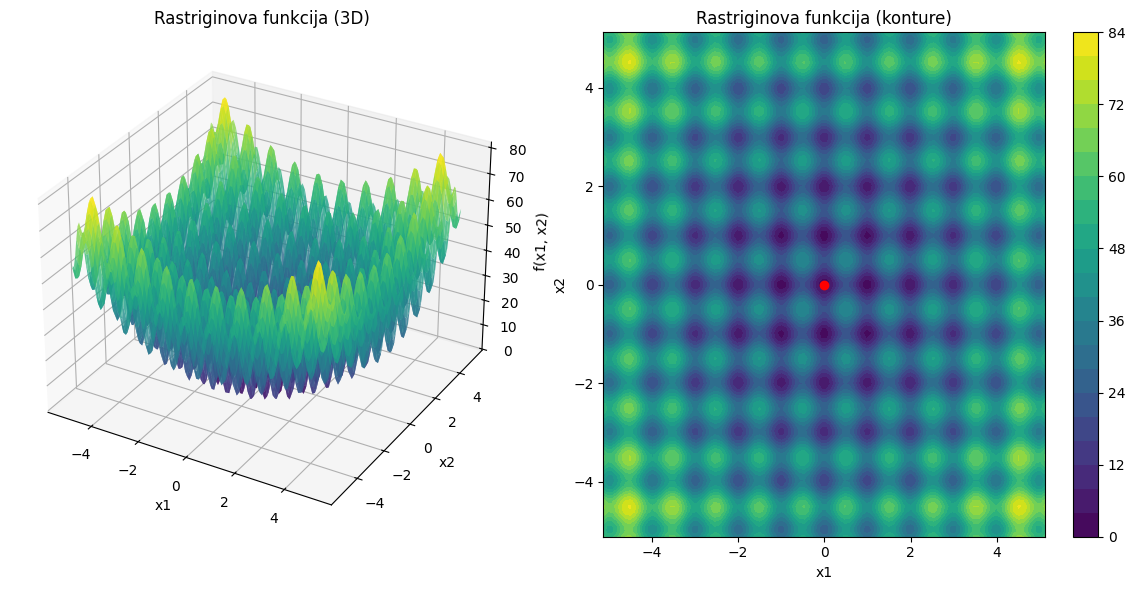

Komentar:
Rastriginova funkcija je klasičan primjer multimodalne funkcije. To znači da ima mnogo lokalnih minimuma.
Globalni minimum se nalazi u tački (0,0) gdje je vrijednost funkcije 0.
Oblik funkcije je 'jajasta kutija' sa mnogo talasanja (oscilacija) koje stvaraju lokalne optimume.
Ovo je čini teškom za optimizaciju za algoritme koji lako zapadaju u lokalne optimume.


In [ ]:
# 1.a: Iscrtavanje Rastriginove funkcije

x = np.linspace(RASTRIGIN_RANGE[0][0], RASTRIGIN_RANGE[0][1], 100)
y = np.linspace(RASTRIGIN_RANGE[1][0], RASTRIGIN_RANGE[1][1], 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin_function([X, Y])

fig = plt.figure(figsize=(12, 6))

# 3D plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=cm.viridis, rstride=1, cstride=1, edgecolor='none', alpha=0.8)
ax1.set_title('Rastriginova funkcija (3D)')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('f(x1, x2)')

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, Z, 20, cmap=cm.viridis)
ax2.plot(0,0,'ro') # Globalni minimum
fig.colorbar(contour)
ax2.set_title('Rastriginova funkcija (konture)')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')

plt.tight_layout()
plt.show()

print("Komentar:")
print("Rastriginova funkcija je klasičan primjer multimodalne funkcije. To znači da ima mnogo lokalnih minimuma.")
print("Globalni minimum se nalazi u tački (0,0) gdje je vrijednost funkcije 0.")
print("Oblik funkcije je 'jajasta kutija' sa mnogo talasanja (oscilacija) koje stvaraju lokalne optimume.")
print("Ovo je čini teškom za optimizaciju za algoritme koji lako zapadaju u lokalne optimume.")

In [ ]:
# 1.b: Promjena dužine hromosoma

print("Originalna dužina hromosoma po varijabli:", BINARY_CHROMOSOME_LENGTH_PER_VAR)
print("Originalna ukupna dužina hromosoma:", TOTAL_BINARY_CHROMOSOME_LENGTH)

# Postavljamo novu dužinu hromosoma
NEW_BINARY_CHROMOSOME_LENGTH_PER_VAR = 6
TOTAL_BINARY_CHROMOSOME_LENGTH = 2 * NEW_BINARY_CHROMOSOME_LENGTH_PER_VAR # mora se ažurirati globalna varijabla
                                                                      # koju koriste funkcije create_individual i decode

print(f"\nNova dužina hromosoma po varijabli: {NEW_BINARY_CHROMOSOME_LENGTH_PER_VAR}")
print(f"Nova ukupna dužina hromosoma: {TOTAL_BINARY_CHROMOSOME_LENGTH}")

# Ponovno inicijaliziramo GA s istim postavkama osim potencijalno dužine hromosoma
# koja se implicitno koristi u create_individual i decode
ga_b = GeneticAlgorithm(seed_data=rastrigin_function,
                        population_size=50,
                        generations=100,
                        crossover_probability=0.8,
                        mutation_probability=0.05,
                        elitism=True,
                        maximise_fitness=False)

# Moramo eksplicitno reći GA objektu da koristi naše funkcije koje zavise od TOTAL_BINARY_CHROMOSOME_LENGTH
ga_b.create_individual = create_individual_rastrigin
ga_b.crossover_function = crossover_two_point
ga_b.mutate_function = mutate_bit_flip
ga_b.fitness_function = fitness_rastrigin

print("\nPokretanje GA sa novom dužinom hromosoma (6 bita po varijabli)...")
ga_b.run()

best_fitness_b, best_individual_b = ga_b.best_individual()
decoded_solution_b = decode_rastrigin(best_individual_b)

print(f"\nNajbolje pronađeno rješenje (fitness): {best_fitness_b}")
print(f"Dekodirane koordinate (x1, x2): {decoded_solution_b}")
print(f"Binarni hromosom: {best_individual_b}")

max_val_for_6_bits = 2**NEW_BINARY_CHROMOSOME_LENGTH_PER_VAR - 1
step_size = (RASTRIGIN_RANGE[0][1] - RASTRIGIN_RANGE[0][0]) / max_val_for_6_bits
print(f"\nSa {NEW_BINARY_CHROMOSOME_LENGTH_PER_VAR} bita po varijabli, imamo {max_val_for_6_bits+1} mogućih vrijednosti.")
print(f"Minimalni korak (preciznost) po dimenziji: {step_size:.4f}")


print("\nKomentar:")
print("Smanjenjem dužine hromosoma sa npr. 13 bita po varijabli (ukupno 26) na 6 bita po varijabli (ukupno 12), ")
print("smanjuje se broj mogućih diskretnih vrijednosti koje svaka varijabla može uzeti unutar datog opsega.")
print("To znači da je preciznost predstavljanja realnih brojeva *manja*, a ne veća.")
print("Manja preciznost znači da je prostor pretrage grublji (diskretizovan na manje tačaka).")
print("Optimalno rješenje (0,0) možda neće biti tačno dostižno ako nije jedna od diskretnih tačaka.")
print("U opštem slučaju, veća dužina hromosoma (više bita) omogućava veću preciznost, ali i veći prostor pretrage genotipa.")

# Vraćamo na originalne vrijednosti za naredne zadatke, ako je potrebno
BINARY_CHROMOSOME_LENGTH_PER_VAR = 13
TOTAL_BINARY_CHROMOSOME_LENGTH = 2 * BINARY_CHROMOSOME_LENGTH_PER_VAR
print(f"\nVraćena dužina hromosoma na originalnih {BINARY_CHROMOSOME_LENGTH_PER_VAR} bita po varijabli za naredne zadatke.")

Originalna dužina hromosoma po varijabli: 13
Originalna ukupna dužina hromosoma: 26

Nova dužina hromosoma po varijabli: 6
Nova ukupna dužina hromosoma: 12

Pokretanje GA sa novom dužinom hromosoma (6 bita po varijabli)...

Najbolje pronađeno rješenje (fitness): 2.564507861121598
Dekodirane koordinate (x1, x2): [np.float64(0.08126984126984116), np.float64(0.08126984126984116)]
Binarni hromosom: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

Sa 6 bita po varijabli, imamo 64 mogućih vrijednosti.
Minimalni korak (preciznost) po dimenziji: 0.1625

Komentar:
Smanjenjem dužine hromosoma sa npr. 13 bita po varijabli (ukupno 26) na 6 bita po varijabli (ukupno 12), 
smanjuje se broj mogućih diskretnih vrijednosti koje svaka varijabla može uzeti unutar datog opsega.
To znači da je preciznost predstavljanja realnih brojeva *manja*, a ne veća.
Manja preciznost znači da je prostor pretrage grublji (diskretizovan na manje tačaka).
Optimalno rješenje (0,0) možda neće biti tačno dostižno ako nije jedna od disk

In [ ]:
# 1.c: Varijacija mutation_probability

# Vraćamo dužinu hromosoma na razumniju vrednost za upoređivanje
BINARY_CHROMOSOME_LENGTH_PER_VAR = 13
TOTAL_BINARY_CHROMOSOME_LENGTH = 2 * BINARY_CHROMOSOME_LENGTH_PER_VAR

mutation_probabilities = [0.001, 0.01, 0.05, 0.1, 0.5, 0.9]
results_c = {}

print("Testiranje različitih vrijednosti mutation_probability:")
for mut_prob in mutation_probabilities:
    print(f"\n--- Mutation Probability: {mut_prob} ---")
    ga_c = GeneticAlgorithm(seed_data=rastrigin_function,
                            population_size=50,
                            generations=100,
                            crossover_probability=0.8, # Fiksna za ovaj test
                            mutation_probability=mut_prob,
                            elitism=True,
                            maximise_fitness=False)

    ga_c.create_individual = create_individual_rastrigin
    ga_c.crossover_function = crossover_two_point
    ga_c.mutate_function = mutate_bit_flip
    ga_c.fitness_function = fitness_rastrigin

    ga_c.run()
    best_fitness, best_individual = ga_c.best_individual()
    decoded_solution = decode_rastrigin(best_individual)
    results_c[mut_prob] = {'fitness': best_fitness, 'solution': decoded_solution}

    print(f"Najbolji fitness: {best_fitness:.4f}")
    print(f"Rješenje (x1,x2): ({decoded_solution[0]:.4f}, {decoded_solution[1]:.4f})")

print("\n--- Rezultati za mutation_probability ---")
for prob, res in results_c.items():
    print(f"Prob: {prob:5.3f} | Fitness: {res['fitness']:8.4f} | Sol: ({res['solution'][0]:.3f}, {res['solution'][1]:.3f})")

print("\nKomentar:")
print("Niska mutation_probability (npr. 0.001-0.01):")
print("  - Algoritam se više oslanja na crossover.")
print("  - Može dovesti do preuranjene konvergencije ako populacija izgubi raznolikost.")
print("  - Sporije istraživanje novih dijelova prostora.")
print("Umjerena mutation_probability (npr. 0.05-0.1):")
print("  - Obično daje dobar balans između eksploatacije (crossover) i istraživanja (mutacija).")
print("  - Pomaže u održavanju raznolikosti i izbjegavanju lokalnih optimuma.")
print("Visoka mutation_probability (npr. 0.5-0.9):")
print("  - Algoritam se ponaša više kao nasumična pretraga.")
print("  - Otežava konvergenciju ka dobrim rješenjima jer se 'dobri' hromosomi stalno previše mijenjaju.")
print("  - Može uništiti dobre gradivne blokove (building blocks) koje je crossover stvorio.")
print("Optimalna vrijednost često zavisi od problema, veličine populacije i drugih parametara.")

Testiranje različitih vrijednosti mutation_probability:

--- Mutation Probability: 0.001 ---
Najbolji fitness: 2.0307
Rješenje (x1,x2): (0.9970, 0.9807)

--- Mutation Probability: 0.01 ---
Najbolji fitness: 1.9922
Rješenje (x1,x2): (0.9957, 0.9982)

--- Mutation Probability: 0.05 ---
Najbolji fitness: 1.9901
Rješenje (x1,x2): (-0.9945, 0.9957)

--- Mutation Probability: 0.1 ---
Najbolji fitness: 2.0032
Rješenje (x1,x2): (1.0007, 1.0007)

--- Mutation Probability: 0.5 ---
Najbolji fitness: 0.0002
Rješenje (x1,x2): (0.0006, 0.0006)

--- Mutation Probability: 0.9 ---
Najbolji fitness: 0.0002
Rješenje (x1,x2): (-0.0006, -0.0006)

--- Rezultati za mutation_probability ---
Prob: 0.001 | Fitness:   2.0307 | Sol: (0.997, 0.981)
Prob: 0.010 | Fitness:   1.9922 | Sol: (0.996, 0.998)
Prob: 0.050 | Fitness:   1.9901 | Sol: (-0.994, 0.996)
Prob: 0.100 | Fitness:   2.0032 | Sol: (1.001, 1.001)
Prob: 0.500 | Fitness:   0.0002 | Sol: (0.001, 0.001)
Prob: 0.900 | Fitness:   0.0002 | Sol: (-0.001, -0.00

In [ ]:
# 1.d: Varijacija generations i population_size

# Vraćamo dužinu hromosoma ako je mijenjana
BINARY_CHROMOSOME_LENGTH_PER_VAR = 13
TOTAL_BINARY_CHROMOSOME_LENGTH = 2 * BINARY_CHROMOSOME_LENGTH_PER_VAR

# Scenariji: (population_size, generations)
# Ukupan broj evaluacija fitness funkcije je otprilike population_size * generations
scenarios_d = [
    (20, 250), # Mala populacija, mnogo generacija (ukupno ~5000 evaluacija)
    (50, 100), # Srednja populacija, srednje generacija (ukupno ~5000 evaluacija) - naš default
    (100, 50), # Veća populacija, manje generacija (ukupno ~5000 evaluacija)
    (250, 20), # Velika populacija, malo generacija (ukupno ~5000 evaluacija)
    (20, 50),  # Mala populacija, malo generacija (ukupno ~1000 evaluacija) - za poređenje
]

results_d = {}

print("Testiranje različitih kombinacija population_size i generations:")
for pop_size, gens in scenarios_d:
    print(f"\n--- Population Size: {pop_size}, Generations: {gens} ---")
    ga_d = GeneticAlgorithm(seed_data=rastrigin_function,
                            population_size=pop_size,
                            generations=gens,
                            crossover_probability=0.8,
                            mutation_probability=0.05, # Vraćamo na neku srednju vrijednost
                            elitism=True,
                            maximise_fitness=False)

    ga_d.create_individual = create_individual_rastrigin
    ga_d.crossover_function = crossover_two_point
    ga_d.mutate_function = mutate_bit_flip
    ga_d.fitness_function = fitness_rastrigin

    ga_d.run()
    best_fitness, best_individual = ga_d.best_individual()
    decoded_solution = decode_rastrigin(best_individual)
    results_d[(pop_size, gens)] = {'fitness': best_fitness, 'solution': decoded_solution}

    print(f"Najbolji fitness: {best_fitness:.4f}")
    print(f"Rješenje (x1,x2): ({decoded_solution[0]:.4f}, {decoded_solution[1]:.4f})")

print("\n--- Rezultati za population_size i generations ---")
for (ps, g), res in results_d.items():
    print(f"Pop: {ps:3d}, Gens: {g:3d} | Fitness: {res['fitness']:8.4f} | Sol: ({res['solution'][0]:.3f}, {res['solution'][1]:.3f})")

print("\nKomentar na pitanje 'Da li je bolje za manje populacije koristiti više ili manje generacija?':")
print("Za manje populacije generalno je potrebno više generacija da bi se postigli dobri rezultati.")
print("Razlozi:")
print("  - Manja populacija ima manju genetsku raznolikost u startu.")
print("  - Potrebno je više iteracija (generacija) da bi mutacije i crossover imali priliku da istraže prostor")
print("    i pronađu dobre kombinacije gena.")
print("  - S manjom populacijom, rizik od preuranjene konvergencije je veći, pa više generacija (uz adekvatnu mutaciju)")
print("    daje više šanse za 'bijeg' iz lokalnih optimuma.")
print("Ako je broj generacija premali za malu populaciju, algoritam možda neće imati dovoljno vremena da konvergira ka dobrom rješenju.")
print("Međutim, prevelik broj generacija za malu populaciju može biti neefikasan ako je raznolikost već izgubljena.")
print("Balans je ključan. Često se cilja sličan ukupan broj evaluacija fitness funkcije (pop_size * generations).")

Testiranje različitih kombinacija population_size i generations:

--- Population Size: 20, Generations: 250 ---
Najbolji fitness: 0.9951
Rješenje (x1,x2): (0.9945, 0.0006)

--- Population Size: 50, Generations: 100 ---
Najbolji fitness: 0.0002
Rješenje (x1,x2): (0.0006, -0.0006)

--- Population Size: 100, Generations: 50 ---
Najbolji fitness: 0.0002
Rješenje (x1,x2): (0.0006, 0.0006)

--- Population Size: 250, Generations: 20 ---
Najbolji fitness: 0.0002
Rješenje (x1,x2): (0.0006, 0.0006)

--- Population Size: 20, Generations: 50 ---
Najbolji fitness: 1.0181
Rješenje (x1,x2): (-0.0006, 1.0057)

--- Rezultati za population_size i generations ---
Pop:  20, Gens: 250 | Fitness:   0.9951 | Sol: (0.994, 0.001)
Pop:  50, Gens: 100 | Fitness:   0.0002 | Sol: (0.001, -0.001)
Pop: 100, Gens:  50 | Fitness:   0.0002 | Sol: (0.001, 0.001)
Pop: 250, Gens:  20 | Fitness:   0.0002 | Sol: (0.001, 0.001)
Pop:  20, Gens:  50 | Fitness:   1.0181 | Sol: (-0.001, 1.006)

Komentar na pitanje 'Da li je bolj

In [ ]:
# 1.e: population_size = 5, bez elitizma

# Vraćamo dužinu hromosoma ako je mijenjana
BINARY_CHROMOSOME_LENGTH_PER_VAR = 13
TOTAL_BINARY_CHROMOSOME_LENGTH = 2 * BINARY_CHROMOSOME_LENGTH_PER_VAR

pop_size_e = 5
elitism_e = False
generations_e = 100 # Zadržavamo isti broj generacija za poređenje

print(f"\n--- Population Size: {pop_size_e}, Elitism: {elitism_e}, Generations: {generations_e} ---")
ga_e = GeneticAlgorithm(seed_data=rastrigin_function,
                        population_size=pop_size_e,
                        generations=generations_e,
                        crossover_probability=0.8,
                        mutation_probability=0.05,
                        elitism=elitism_e,
                        maximise_fitness=False)

ga_e.create_individual = create_individual_rastrigin
ga_e.crossover_function = crossover_two_point
ga_e.mutate_function = mutate_bit_flip
ga_e.fitness_function = fitness_rastrigin

ga_e.run()
best_fitness_e, best_individual_e = ga_e.best_individual()
decoded_solution_e = decode_rastrigin(best_individual_e)

print(f"Najbolji fitness: {best_fitness_e:.4f}")
print(f"Rješenje (x1,x2): ({decoded_solution_e[0]:.4f}, {decoded_solution_e[1]:.4f})")

print("\nKomentar:")
print("Sa veoma malom veličinom populacije (npr. 5) i isključenim elitizmom, performanse GA su obično znatno lošije.")
print("Razlozi:")
print("  - Izuzetno mala genetska raznolikost: Sa samo 5 jedinki, populacija brzo gubi raznolikost.")
print("  - Bez elitizma: Najbolje pronađeno rješenje u jednoj generaciji može biti izgubljeno u sljedećoj")
print("    ako ga operatori ukrštanja i mutacije 'pokvare' ili ako nije odabrano za reprodukciju.")
print("    Elitizam garantuje da se najbolje rješenje prenosi, što je posebno važno kod malih populacija.")
print("Generalno, nije očekivano da se postigne bolje rješenje pod ovim uslovima u poređenju sa većom populacijom i elitizmom.")
print("Rezultati mogu biti veoma nestabilni i zavisni od slučajnosti.")


--- Population Size: 5, Elitism: False, Generations: 100 ---
Najbolji fitness: 5.3190
Rješenje (x1,x2): (-0.8770, -0.9345)

Komentar:
Sa veoma malom veličinom populacije (npr. 5) i isključenim elitizmom, performanse GA su obično znatno lošije.
Razlozi:
  - Izuzetno mala genetska raznolikost: Sa samo 5 jedinki, populacija brzo gubi raznolikost.
  - Bez elitizma: Najbolje pronađeno rješenje u jednoj generaciji može biti izgubljeno u sljedećoj
    ako ga operatori ukrštanja i mutacije 'pokvare' ili ako nije odabrano za reprodukciju.
    Elitizam garantuje da se najbolje rješenje prenosi, što je posebno važno kod malih populacija.
Generalno, nije očekivano da se postigne bolje rješenje pod ovim uslovima u poređenju sa većom populacijom i elitizmom.
Rezultati mogu biti veoma nestabilni i zavisni od slučajnosti.


In [ ]:
# 1.f: Rulet-točak i selekcija na bazi ranga

# Vraćamo dužinu hromosoma ako je mijenjana
BINARY_CHROMOSOME_LENGTH_PER_VAR = 13
TOTAL_BINARY_CHROMOSOME_LENGTH = 2 * BINARY_CHROMOSOME_LENGTH_PER_VAR

# --- 1. Rulet-točak selekcija (za minimizaciju) ---
def roulette_wheel_selection(population):
    """
    population: lista pyeasyga Chromosome objekata.
    Funkcija treba da vrati ODABRANI Chromosome OBJEKAT.
    """
    selection_scores = []
    for chromosome in population:
        score = 1.0 / (1.0 + chromosome.fitness)
        selection_scores.append(score)

    total_score = sum(selection_scores)
    if total_score == 0:
        return random.choice(population) # Vraćamo cijeli Chromosome objekat

    pick = random.uniform(0, total_score)
    current_score = 0
    for i, chromosome in enumerate(population):
        current_score += selection_scores[i]
        if current_score >= pick:
            return chromosome # Vraćamo cijeli Chromosome objekat
    return population[-1] # Fallback, vraćamo cijeli Chromosome objekat


# --- 2. Selekcija na bazi ranga (za minimizaciju) ---
SELECTION_PRESSURE_SP = 1.5

def rank_based_selection(population):
    """
    population: lista pyeasyga Chromosome objekata.
    Funkcija treba da vrati ODABRANI Chromosome OBJEKAT.
    """
    m = len(population)
    if m == 0: return None
    if m == 1: return population[0]

    rank_fitnesses = []
    for i in range(m):
        rank_i = i + 1
        norm_rank_for_formula = (m - rank_i) / (m - 1.0) if m > 1 else 1.0
        f_mod = (2.0 - SELECTION_PRESSURE_SP) + 2.0 * (SELECTION_PRESSURE_SP - 1.0) * norm_rank_for_formula
        rank_fitnesses.append(f_mod)

    total_rank_fitness = sum(rank_fitnesses)
    if total_rank_fitness == 0 or total_rank_fitness < 1e-9:
        return random.choice(population) # Vraćamo cijeli Chromosome objekat

    pick = random.uniform(0, total_rank_fitness)
    current_sum = 0
    for i, chromosome in enumerate(population):
        current_sum += rank_fitnesses[i]
        if current_sum >= pick:
            return chromosome # Vraćamo cijeli Chromosome objekat
    return population[-1] # Fallback, vraćamo cijeli Chromosome objekat


# Testiranje Rulet-točak selekcije
print("\n--- Testiranje Rulet-točak selekcije ---")
ga_roulette = GeneticAlgorithm(seed_data=rastrigin_function,
                               population_size=50,
                               generations=100,
                               crossover_probability=0.8,
                               mutation_probability=0.05,
                               elitism=True,
                               maximise_fitness=False)
ga_roulette.create_individual = create_individual_rastrigin
ga_roulette.crossover_function = crossover_two_point
ga_roulette.mutate_function = mutate_bit_flip
ga_roulette.fitness_function = fitness_rastrigin
ga_roulette.selection_function = roulette_wheel_selection

ga_roulette.run()
best_fitness_r, best_individual_r_genes = ga_roulette.best_individual()
decoded_solution_r = decode_rastrigin(best_individual_r_genes)
print(f"Rulet-točak: Najbolji fitness: {best_fitness_r:.4f}, Rješenje: ({decoded_solution_r[0]:.4f}, {decoded_solution_r[1]:.4f})")


# Testiranje Selekcije na bazi ranga
print("\n--- Testiranje Selekcije na bazi ranga ---")
ga_rank = GeneticAlgorithm(seed_data=rastrigin_function,
                           population_size=50,
                           generations=100,
                           crossover_probability=0.8,
                           mutation_probability=0.05,
                           elitism=True,
                           maximise_fitness=False)
ga_rank.create_individual = create_individual_rastrigin
ga_rank.crossover_function = crossover_two_point
ga_rank.mutate_function = mutate_bit_flip
ga_rank.fitness_function = fitness_rastrigin
ga_rank.selection_function = rank_based_selection

ga_rank.run()
best_fitness_rank, best_individual_rank_genes = ga_rank.best_individual()
decoded_solution_rank = decode_rastrigin(best_individual_rank_genes)
print(f"Selekcija na bazi ranga (SP={SELECTION_PRESSURE_SP}): Najbolji fitness: {best_fitness_rank:.4f}, Rješenje: ({decoded_solution_rank[0]:.4f}, {decoded_solution_rank[1]:.4f})")

# Podrazumijevana (Turnirska) selekcija za poređenje
print("\n--- Testiranje Turnirske selekcije (default) ---")
ga_tournament = GeneticAlgorithm(seed_data=rastrigin_function,
                                population_size=50,
                                generations=100,
                                crossover_probability=0.8,
                                mutation_probability=0.05,
                                elitism=True,
                                maximise_fitness=False)
ga_tournament.create_individual = create_individual_rastrigin
ga_tournament.crossover_function = crossover_two_point
ga_tournament.mutate_function = mutate_bit_flip
ga_tournament.fitness_function = fitness_rastrigin

ga_tournament.run()
best_fitness_t, best_individual_t_genes = ga_tournament.best_individual()
decoded_solution_t = decode_rastrigin(best_individual_t_genes)
print(f"Turnirska selekcija: Najbolji fitness: {best_fitness_t:.4f}, Rješenje: ({decoded_solution_t[0]:.4f}, {decoded_solution_t[1]:.4f})")

print("\nKomentar:")
# ... (ostatak komentara je isti)
print("Rulet-točak selekcija:")
print("  - Vjerovatnoća odabira jedinke je proporcionalna njenom (transformisanom) fitness-u.")
print("  - Može patiti od problema preuranjene konvergencije ako nekoliko jedinki ima znatno bolji fitness (tzv. super-jedinke),")
print("    jer će one dominirati selekcijom i smanjiti raznolikost.")
print("  - Osjetljiva na skaliranje fitness funkcije (npr. ako se sve fitness vrijednosti pomjere za konstantu).")
print("Selekcija na bazi ranga:")
print("  - Vjerovatnoća odabira zavisi samo od ranga jedinke u populaciji, ne od apsolutne vrijednosti fitness-a.")
print("  - Manje sklona preuranjenoj konvergenciji od rulet-točka jer sprečava da super-jedinke previše dominiraju.")
print("  - Parametar SP (Selection Pressure) kontroliše koliko se favorizuju bolje rangirane jedinke.")
print("  - Smatra se robusnijom od rulet-točka.")
print("Turnirska selekcija (default u pyeasyga):")
print("  - Nasumično se bira k jedinki iz populacije, i najbolja od njih postaje roditelj.")
print("  - Efikasna i jednostavna za implementaciju.")
print("  - Pritisak selekcije se može kontrolisati veličinom turnira (k).")
print("U praksi, performanse zavise od problema. Selekcija na bazi ranga i turnirska često daju bolje i stabilnije rezultate od osnovne rulet-točak selekcije.")


--- Testiranje Rulet-točak selekcije ---
Rulet-točak: Najbolji fitness: 4.0037, Rješenje: (2.0009, -0.0006)

--- Testiranje Selekcije na bazi ranga ---
Selekcija na bazi ranga (SP=1.5): Najbolji fitness: 0.0002, Rješenje: (0.0006, -0.0006)

--- Testiranje Turnirske selekcije (default) ---
Turnirska selekcija: Najbolji fitness: 0.0002, Rješenje: (-0.0006, -0.0006)

Komentar:
Rulet-točak selekcija:
  - Vjerovatnoća odabira jedinke je proporcionalna njenom (transformisanom) fitness-u.
  - Može patiti od problema preuranjene konvergencije ako nekoliko jedinki ima znatno bolji fitness (tzv. super-jedinke),
    jer će one dominirati selekcijom i smanjiti raznolikost.
  - Osjetljiva na skaliranje fitness funkcije (npr. ako se sve fitness vrijednosti pomjere za konstantu).
Selekcija na bazi ranga:
  - Vjerovatnoća odabira zavisi samo od ranga jedinke u populaciji, ne od apsolutne vrijednosti fitness-a.
  - Manje sklona preuranjenoj konvergenciji od rulet-točka jer sprečava da super-jedinke pr

In [ ]:
# 2.0: Kod za problem 8 kraljica iz pyeasyga dokumentacije (samo uzeo sam sa linka https://pyeasyga.readthedocs.io/en/latest/examples.html#queens-puzzle)

# Podaci za problem N kraljica (N=8 za ovaj primjer)
# Svaka jedinka (hromosom) je lista gdje je indeks kolona, a vrijednost je red kraljice u toj koloni.
# Npr., [0, 4, 7, 5, 2, 6, 1, 3] znači da je kraljica u koloni 0 u redu 0,
# kraljica u koloni 1 u redu 4, itd.
# Ovo automatski osigurava da nema dvije kraljice u istoj koloni.

N_QUEENS = 8
# seed_data nije direktno korištena u create_individual, ali je korisna za fitness
# Možemo proslijediti N_QUEENS kao seed_data ako želimo generalizaciju
data_queens = [{'n_queens': N_QUEENS}] # Proslijeđeno kao lista da bi bilo iterable

# Funkcija za kreiranje jedinke (pozicije kraljica)
def create_individual_queens(data):
    # data[0]['n_queens'] bi bio način da se pristupi N ako se proslijedi
    # Ovdje ćemo koristiti globalnu N_QUEENS radi jednostavnosti kao u primjeru
    individual = list(range(N_QUEENS)) # Počinjemo sa [0,1,2,3,4,5,6,7]
    random.shuffle(individual)         # Nasumično miješamo redove
    return individual

# Fitness funkcija: broj parova kraljica koje se NE napadaju
# Cilj je maksimizirati ovaj broj. Maksimalan broj ne-napadajućih parova je N*(N-1)/2.
# Ako je fitness jednak N*(N-1)/2, pronađeno je rješenje.
def fitness_queens(individual, data):
    # data[0]['n_queens']
    non_attacking_pairs = 0
    # Brojimo parove (i, j) gdje je i < j
    for i in range(N_QUEENS):
        for j in range(i + 1, N_QUEENS):
            queen1_col, queen1_row = i, individual[i]
            queen2_col, queen2_row = j, individual[j]

            # Provjera horizontalnog napada (nije moguća zbog našeg kodiranja, svaka kraljica je u svom redu inicijalno,
            # ali create_individual osigurava da su vrijednosti u listi jedinstvene, tj. svaka kraljica je u jedinstvenom redu)
            # Naše kodiranje `individual = list(range(N_QUEENS)); random.shuffle(individual)` osigurava da su sve vrijednosti (redovi) jedinstvene.
            # Dakle, nema potrebe za provjerom horizontalnog napada.

            # Provjera dijagonalnog napada
            # abs(red1 - red2) == abs(kolona1 - kolona2)
            if abs(queen1_row - queen2_row) == abs(queen1_col - queen2_col):
                pass # Napadaju se dijagonalno
            else:
                non_attacking_pairs += 1

    return non_attacking_pairs

# Crossover: Jednostruki (single-point) crossover
# Iz primjera: "single point crossover on the permutation"
# Ovo je malo kompleksnije za permutacije da bi se osiguralo da djeca ostanu validne permutacije.
# Standardni single-point crossover na listama brojeva bi mogao stvoriti duplikate.
# Primjer u pyeasyga dokumentaciji ne specificira tačan mehanizam za permutacije,
# ali često se koristi npr. PMX (Partially Mapped Crossover) ili Order Crossover (OX1).
# Za jednostavnost, koristićemo osnovni single-point, svjesni da može narušiti permutaciju.
# Biblioteka pyeasyga interno može imati bolji handler ili očekuje da korisnik osigura validnost.
# Pretpostavimo da primjer koristi jednostavni single point, i da se oslanja na
# selekciju i mutaciju da poprave stvari, ili da je to pojednostavljenje u primjeru.
# Hajde da implementiramo jednostavni single-point crossover kao u mnogim GA primjerima.
def crossover_queens_simple_sp(parent_1, parent_2):
    # data[0]['n_queens']
    point = random.randrange(1, N_QUEENS -1) # Tačka presijecanja
    child_1 = parent_1[:point] + parent_2[point:]
    child_2 = parent_2[:point] + parent_1[point:]
    # NAPOMENA: Ovaj crossover može proizvesti nevalidne permutacije (duple redove).
    # Za problem N-kraljica, bolji su specijalizovani crossover operatori (PMX, OX, CX).
    # pyeasyga primjer ne detaljizira ovo, pa ćemo koristiti ovaj za ilustraciju,
    # ali u praksi bi ovo trebalo pažljivije implementirati.
    # Često se nakon ovakvog crossovera radi "popravka" djeteta.
    # Za sada, pretpostavimo da je ovo dovoljno za primjer.

    # Funkcija za popravku (osigurava da je permutacija)
    def repair(child):
        repaired_child = []
        used_values = set()
        # Prvo zadržavamo jedinstvene vrijednosti iz originalnog djeteta
        for gene in child:
            if gene not in used_values:
                repaired_child.append(gene)
                used_values.add(gene)

        # Ako nedostaju neke vrijednosti (0 do N-1)
        if len(repaired_child) < N_QUEENS:
            missing_values = [val for val in range(N_QUEENS) if val not in used_values]
            random.shuffle(missing_values)
            repaired_child.extend(missing_values[:N_QUEENS - len(repaired_child)]) # Dodajemo preostale
        return repaired_child[:N_QUEENS] # Osiguravamo tačnu dužinu

    return repair(child_1), repair(child_2)


# Mutacija: Zamjena mjesta dvaju nasumično odabranih kraljica (swap mutation)
def mutate_queens_swap(individual):
    # data[0]['n_queens']
    idx1, idx2 = random.sample(range(N_QUEENS), 2) # Uzmi dva različita indeksa
    individual[idx1], individual[idx2] = individual[idx2], individual[idx1] # Zamijeni vrijednosti na tim indeksima
    return individual


# Inicijalizacija GA za problem N kraljica
ga_queens = GeneticAlgorithm(seed_data=data_queens, # Proslijeđujemo N_QUEENS
                             population_size=100,    # Veća populacija može biti korisna
                             generations=200,       # Više generacija
                             crossover_probability=0.8,
                             mutation_probability=0.1, # Malo veća mutacija za permutacije
                             elitism=True,
                             maximise_fitness=True) # Cilj je maksimizirati broj ne-napadajućih parova

ga_queens.create_individual = create_individual_queens
ga_queens.fitness_function = fitness_queens
ga_queens.crossover_function = crossover_queens_simple_sp # Koristimo naš jednostavni SP sa popravkom
ga_queens.mutate_function = mutate_queens_swap

print("Postavka za problem 8 kraljica je spremna.")
print("Pokretanje GA za problem 8 kraljica...")
ga_queens.run()

best_fitness_q, best_individual_q = ga_queens.best_individual()
max_possible_fitness = N_QUEENS * (N_QUEENS - 1) / 2

print(f"\nNajbolji pronađeni fitness: {best_fitness_q} (od mogućih {max_possible_fitness})")
print(f"Najbolje pronađeno rješenje (raspored kraljica): {best_individual_q}")

if best_fitness_q == max_possible_fitness:
    print("Pronađeno je validno rješenje za problem 8 kraljica!")
else:
    print("Nije pronađeno savršeno rješenje u ovom pokretanju.")

# Funkcija za vizualizaciju table (opciono)
def print_board(solution):
    n = len(solution)
    for row_idx in range(n): # Iteriramo kroz redove table
        line = ""
        for col_idx in range(n): # Iteriramo kroz kolone table
            if solution[col_idx] == row_idx: # Ako je kraljica u (col_idx, solution[col_idx]) na trenutnom redu
                line += "Q "
            else:
                line += ". "
        print(line)

if best_fitness_q == max_possible_fitness:
    print("\nVizualizacija rješenja:")
    print_board(best_individual_q)

Postavka za problem 8 kraljica je spremna.
Pokretanje GA za problem 8 kraljica...

Najbolji pronađeni fitness: 28 (od mogućih 28.0)
Najbolje pronađeno rješenje (raspored kraljica): [2, 5, 3, 0, 7, 4, 6, 1]
Pronađeno je validno rješenje za problem 8 kraljica!

Vizualizacija rješenja:
. . . Q . . . . 
. . . . . . . Q 
Q . . . . . . . 
. . Q . . . . . 
. . . . . Q . . 
. Q . . . . . . 
. . . . . . Q . 
. . . . Q . . . 


In [ ]:
# 2.a: Mehanizam kodiranja

print("Odgovor na 2.a: Mehanizam kodiranja")
print("--------------------------------------")
print("Jedinka (hromosom) predstavlja raspored N kraljica na N x N šahovskoj tabli.")
print("Koristi se permutaciono kodiranje:")
print("  - Hromosom je lista (ili niz) dužine N.")
print("  - Indeks `i` u listi predstavlja i-tu kolonu (od 0 do N-1).")
print("  - Vrijednost `hromosom[i]` predstavlja red u kojem se nalazi kraljica u i-toj koloni.")
print("  - Na primjer, za N=8, hromosom `[0, 4, 7, 5, 2, 6, 1, 3]` znači:")
print("    - U koloni 0, kraljica je u redu 0.")
print("    - U koloni 1, kraljica je u redu 4.")
print("    - ...")
print("    - U koloni 7, kraljica je u redu 3.")
print("Ovakvo kodiranje inherentno osigurava da nema dvije kraljice u istoj koloni.")
print("Dodatno, funkcija `create_individual_queens` generiše permutaciju brojeva od 0 do N-1 ")
print("(npr. `random.shuffle(list(range(N_QUEENS)))`), što osigurava da nema ni dvije kraljice u istom redu.")
print("Dakle, kodiranje samo po sebi rješava ograničenja po redovima i kolonama, a GA traži rješenje za dijagonalne napade.")
print("\nRelevantna funkcija:")
print("def create_individual_queens(data):")
print("    individual = list(range(N_QUEENS))")
print("    random.shuffle(individual)")
print("    return individual")

Odgovor na 2.a: Mehanizam kodiranja
--------------------------------------
Jedinka (hromosom) predstavlja raspored N kraljica na N x N šahovskoj tabli.
Koristi se permutaciono kodiranje:
  - Hromosom je lista (ili niz) dužine N.
  - Indeks `i` u listi predstavlja i-tu kolonu (od 0 do N-1).
  - Vrijednost `hromosom[i]` predstavlja red u kojem se nalazi kraljica u i-toj koloni.
  - Na primjer, za N=8, hromosom `[0, 4, 7, 5, 2, 6, 1, 3]` znači:
    - U koloni 0, kraljica je u redu 0.
    - U koloni 1, kraljica je u redu 4.
    - ...
    - U koloni 7, kraljica je u redu 3.
Ovakvo kodiranje inherentno osigurava da nema dvije kraljice u istoj koloni.
Dodatno, funkcija `create_individual_queens` generiše permutaciju brojeva od 0 do N-1 
(npr. `random.shuffle(list(range(N_QUEENS)))`), što osigurava da nema ni dvije kraljice u istom redu.
Dakle, kodiranje samo po sebi rješava ograničenja po redovima i kolonama, a GA traži rješenje za dijagonalne napade.

Relevantna funkcija:
def create_individu

In [ ]:
# 2.b: Mehanizam selekcije

print("Odgovor na 2.b: Mehanizam selekcije")
print("-------------------------------------")
print("U prikazanom kodu za problem 8 kraljica, mehanizam selekcije nije eksplicitno definisan.")
print("To znači da `pyeasyga` koristi svoj podrazumijevani mehanizam selekcije.")
print("Podrazumijevani mehanizam selekcije u `pyeasyga` je turnirska selekcija (tournament selection).")
print("Parametri turnirske selekcije (npr. veličina turnira) se mogu podesiti, ali ako nisu, koriste se default vrijednosti.")
print("Default veličina turnira je `population_size // 10`.")
print("   ga_queens = GeneticAlgorithm(...)")
print("   # Nije postavljeno ga_queens.selection_function, pa se koristi default.")

Odgovor na 2.b: Mehanizam selekcije
-------------------------------------
U prikazanom kodu za problem 8 kraljica, mehanizam selekcije nije eksplicitno definisan.
To znači da `pyeasyga` koristi svoj podrazumijevani mehanizam selekcije.
Podrazumijevani mehanizam selekcije u `pyeasyga` je turnirska selekcija (tournament selection).
Parametri turnirske selekcije (npr. veličina turnira) se mogu podesiti, ali ako nisu, koriste se default vrijednosti.
Default veličina turnira je `population_size // 10`.
   ga_queens = GeneticAlgorithm(...)
   # Nije postavljeno ga_queens.selection_function, pa se koristi default.


In [ ]:
# 2.c: Fitness funkcija

print("Odgovor na 2.c: Fitness funkcija")
print("---------------------------------")
print("Fitness funkcija (`fitness_queens`) računa broj parova kraljica koje se *ne napadaju*.")
print("Cilj je maksimizirati ovu vrijednost.")
print("Koraci u fitness funkciji:")
print("  1. Inicijalizuje brojač `non_attacking_pairs` na 0.")
print("  2. Iterira kroz sve jedinstvene parove kraljica (i, j) gdje je i < j.")
print("     - `queen1_col = i`, `queen1_row = individual[i]`")
print("     - `queen2_col = j`, `queen2_row = individual[j]`")
print("  3. Za svaki par provjerava da li se napadaju dijagonalno:")
print("     - Dijagonalni napad postoji ako je `abs(queen1_row - queen2_row) == abs(queen1_col - queen2_col)`.")
print("  4. Ako se par *ne napada* dijagonalno, brojač `non_attacking_pairs` se uvećava za 1.")
print("     (Napomena: Napadi po redovima i kolonama su već spriječeni načinom kodiranja.)")
print("  5. Funkcija vraća ukupan broj parova koji se ne napadaju.")
print("Maksimalna moguća vrijednost fitnessa (kada nema napada) je N * (N - 1) / 2, ")
print("što je ukupan broj parova kraljica na tabli.")
print("   `maximise_fitness=True` je postavljeno u `GeneticAlgorithm` objektu.")
print("\nRelevantna funkcija:")
print("def fitness_queens(individual, data):")
print("    non_attacking_pairs = 0")
print("    for i in range(N_QUEENS):")
print("        for j in range(i + 1, N_QUEENS):")
print("            queen1_col, queen1_row = i, individual[i]")
print("            queen2_col, queen2_row = j, individual[j]")
print("            if abs(queen1_row - queen2_row) == abs(queen1_col - queen2_col):")
print("                pass # Napadaju se dijagonalno")
print("            else:")
print("                non_attacking_pairs += 1")
print("    return non_attacking_pairs")

Odgovor na 2.c: Fitness funkcija
---------------------------------
Fitness funkcija (`fitness_queens`) računa broj parova kraljica koje se *ne napadaju*.
Cilj je maksimizirati ovu vrijednost.
Koraci u fitness funkciji:
  1. Inicijalizuje brojač `non_attacking_pairs` na 0.
  2. Iterira kroz sve jedinstvene parove kraljica (i, j) gdje je i < j.
     - `queen1_col = i`, `queen1_row = individual[i]`
     - `queen2_col = j`, `queen2_row = individual[j]`
  3. Za svaki par provjerava da li se napadaju dijagonalno:
     - Dijagonalni napad postoji ako je `abs(queen1_row - queen2_row) == abs(queen1_col - queen2_col)`.
  4. Ako se par *ne napada* dijagonalno, brojač `non_attacking_pairs` se uvećava za 1.
     (Napomena: Napadi po redovima i kolonama su već spriječeni načinom kodiranja.)
  5. Funkcija vraća ukupan broj parova koji se ne napadaju.
Maksimalna moguća vrijednost fitnessa (kada nema napada) je N * (N - 1) / 2, 
što je ukupan broj parova kraljica na tabli.
   `maximise_fitness=True` je

In [ ]:
# 2.d: Operator ukrštanja

print("Odgovor na 2.d: Operator ukrštanja")
print("-----------------------------------")
print("U našem prilagođenom primjeru koda (`Ćelija 2.0`), definisali smo jednostavan operator ukrštanja")
print("nazvan `crossover_queens_simple_sp` koji pokušava da simulira jednopoložajno (single-point) ukrštanje.")
print("Koraci:")
print("  1. Nasumično se bira tačka presijecanja `point` između 1 i N-2.")
print("  2. Prvo dijete (`child_1`) se formira uzimanjem prvog dijela prvog roditelja (do `point`)")
print("     i drugog dijela drugog roditelja (od `point` do kraja).")
print("  3. Drugo dijete (`child_2`) se formira simetrično.")
print("Međutim, ovaj jednostavni pristup može proizvesti nevalidne permutacije (djeca mogu imati duple redove).")
print("Zbog toga je u našoj implementaciji `crossover_queens_simple_sp` dodata funkcija `repair` koja")
print("pokušava da popravi dijete tako da ono ponovo postane validna permutacija (svi redovi od 0 do N-1 se pojavljuju tačno jednom).")
print("U praksi, za probleme sa permutacionim kodiranjem (kao N-kraljica) koriste se specijalizovani operatori ukrštanja")
print("kao što su PMX (Partially Mapped Crossover), OX (Order Crossover), CX (Cycle Crossover), itd.,")
print("koji su dizajnirani da uvijek proizvode validne permutacije kao djecu.")
print("Originalni primjer iz `pyeasyga` dokumentacije ne specificira koji se tačno crossover koristi,")
print("ali implicira da se koristi 'single point crossover on the permutation'.")
print("\nRelevantna funkcija (naša implementacija sa popravkom):")
print("def crossover_queens_simple_sp(parent_1, parent_2):")
print("    point = random.randrange(1, N_QUEENS -1)")
print("    child_1 = parent_1[:point] + parent_2[point:]")
print("    child_2 = parent_2[:point] + parent_1[point:]")
print("    # ... (poziv repair funkciji)")
print("    return repair(child_1), repair(child_2)")

Odgovor na 2.d: Operator ukrštanja
-----------------------------------
U našem prilagođenom primjeru koda (`Ćelija 2.0`), definisali smo jednostavan operator ukrštanja
nazvan `crossover_queens_simple_sp` koji pokušava da simulira jednopoložajno (single-point) ukrštanje.
Koraci:
  1. Nasumično se bira tačka presijecanja `point` između 1 i N-2.
  2. Prvo dijete (`child_1`) se formira uzimanjem prvog dijela prvog roditelja (do `point`)
     i drugog dijela drugog roditelja (od `point` do kraja).
  3. Drugo dijete (`child_2`) se formira simetrično.
Međutim, ovaj jednostavni pristup može proizvesti nevalidne permutacije (djeca mogu imati duple redove).
Zbog toga je u našoj implementaciji `crossover_queens_simple_sp` dodata funkcija `repair` koja
pokušava da popravi dijete tako da ono ponovo postane validna permutacija (svi redovi od 0 do N-1 se pojavljuju tačno jednom).
U praksi, za probleme sa permutacionim kodiranjem (kao N-kraljica) koriste se specijalizovani operatori ukrštanja
kao što 

In [ ]:
# 2.e: Operator mutacije

print("Odgovor na 2.e: Operator mutacije")
print("----------------------------------")
print("Operator mutacije definisan u primjeru (`mutate_queens_swap`) je zamjenska mutacija (swap mutation).")
print("Koraci:")
print("  1. Nasumično se biraju dva različita indeksa (kolone) `idx1` i `idx2` iz opsega `0` do `N-1`.")
print("  2. Vrijednosti (redovi kraljica) na tim pozicijama u hromosomu se zamijene.")
print("     `individual[idx1], individual[idx2] = individual[idx2], individual[idx1]`")
print("Ovaj tip mutacije je pogodan za permutaciono kodiranje jer uvijek rezultira validnom permutacijom")
print("(ako je roditelj bio validna permutacija).")
print("\nRelevantna funkcija:")
print("def mutate_queens_swap(individual):")
print("    idx1, idx2 = random.sample(range(N_QUEENS), 2)")
print("    individual[idx1], individual[idx2] = individual[idx2], individual[idx1]")
print("    return individual")

Odgovor na 2.e: Operator mutacije
----------------------------------
Operator mutacije definisan u primjeru (`mutate_queens_swap`) je zamjenska mutacija (swap mutation).
Koraci:
  1. Nasumično se biraju dva različita indeksa (kolone) `idx1` i `idx2` iz opsega `0` do `N-1`.
  2. Vrijednosti (redovi kraljica) na tim pozicijama u hromosomu se zamijene.
     `individual[idx1], individual[idx2] = individual[idx2], individual[idx1]`
Ovaj tip mutacije je pogodan za permutaciono kodiranje jer uvijek rezultira validnom permutacijom
(ako je roditelj bio validna permutacija).

Relevantna funkcija:
def mutate_queens_swap(individual):
    idx1, idx2 = random.sample(range(N_QUEENS), 2)
    individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual


In [ ]:
# 2.f: Generalizacija na N kraljica

print("Odgovor na 2.f: Izmjene za generalizovani problem N kraljica")
print("----------------------------------------------------------")
print("Da bi se riješio generalizovani problem N kraljica, potrebno je parametrizovati broj kraljica N.")
print("Glavne izmjene bi bile:")
print("1. Globalna konstanta ili parametar za N:")
print("   - Umjesto fiksne `N_QUEENS = 8`, trebalo bi koristiti varijablu, npr. `N`.")
print("   - `N` bi se moglo proslijediti kroz `seed_data` u GA konstruktoru.")
print("     `data_queens = [{'n_queens': N_ACTUAL}]`")
print("     I onda u funkcijama pristupati sa `n = data[0]['n_queens']` ili `n = individual.n` (ako je pyeasyga dodaje).")
print("     Alternativno, funkcije mogu primiti N kao dodatni argument ako se struktura `pyeasyga` može prilagoditi,")
print("     ili koristiti globalnu varijablu N (manje elegantno).")
print("     Najlakše je da funkcije koje definišemo (create, fitness, crossover, mutate) koriste globalnu varijablu N.")

print("\n2. Funkcija `create_individual_queens(data)`:")
print("   - Treba da koristi parametar N umjesto fiksne vrijednosti.")
print("     `individual = list(range(N))`")
print("     `random.shuffle(individual)`")

print("\n3. Funkcija `fitness_queens(individual, data)`:")
print("   - Petlje treba da idu do N.")
print("     `for i in range(N):`")
print("     `  for j in range(i + 1, N):`")
print("   - Maksimalni fitness bi bio `N * (N - 1) / 2`.")

print("\n4. Funkcija `crossover_queens_simple_sp(parent_1, parent_2)` (ili drugi crossover):")
print("   - Tačka presijecanja treba da se bira u opsegu zavisnom od N.")
print("     `point = random.randrange(1, N - 1)` (ako N > 2)")
print("   - Funkcija za popravku (`repair`) takođe treba da koristi N za generisanje nedostajućih vrijednosti i provjeru dužine.")

print("\n5. Funkcija `mutate_queens_swap(individual)`:")
print("   - Indeksi za zamjenu treba da se biraju iz opsega `range(N)`.")
print("     `idx1, idx2 = random.sample(range(N), 2)`")

print("\n6. GA parametri:")
print("   - `population_size` i `generations` bi možda trebalo prilagoditi za veće vrijednosti N,")
print("     jer problem postaje znatno teži (prostor pretrage raste faktorijelno).")
print("     Za veće N, vjerovatno će biti potrebna veća populacija i/ili više generacija.")

print("\nPrimjer modifikacije (pseudo-kodno, fokus na N):")
print("N_ACTUAL = 10 # Željeni broj kraljica")
print("")
print("def create_individual_queens_N(data):") # data bi mogla sadržati N_ACTUAL
print("    n_val = N_ACTUAL # ili data[0]['n_queens']")
print("    individual = list(range(n_val))")
print("    random.shuffle(individual)")
print("    return individual")
print("")
print("def fitness_queens_N(individual, data):")
print("    n_val = len(individual) # N se može dobiti i iz dužine jedinke")
print("    # ... logika sa n_val ...")
print("    return non_attacking_pairs")
print("")
print("# Slične izmjene za crossover i mutate.")
print("# I onda prilikom inicijalizacije GA:")
print("# ga_n_queens = GeneticAlgorithm(seed_data=[{'n_queens': N_ACTUAL}], ...)")
print("# ga_n_queens.create_individual = create_individual_queens_N")
print("# itd.")

print("\nU suštini, sve reference na fiksni broj 8 treba zamijeniti parametrom N.")

Odgovor na 2.f: Izmjene za generalizovani problem N kraljica
----------------------------------------------------------
Da bi se riješio generalizovani problem N kraljica, potrebno je parametrizovati broj kraljica N.
Glavne izmjene bi bile:
1. Globalna konstanta ili parametar za N:
   - Umjesto fiksne `N_QUEENS = 8`, trebalo bi koristiti varijablu, npr. `N`.
   - `N` bi se moglo proslijediti kroz `seed_data` u GA konstruktoru.
     `data_queens = [{'n_queens': N_ACTUAL}]`
     I onda u funkcijama pristupati sa `n = data[0]['n_queens']` ili `n = individual.n` (ako je pyeasyga dodaje).
     Alternativno, funkcije mogu primiti N kao dodatni argument ako se struktura `pyeasyga` može prilagoditi,
     ili koristiti globalnu varijablu N (manje elegantno).
     Najlakše je da funkcije koje definišemo (create, fitness, crossover, mutate) koriste globalnu varijablu N.

2. Funkcija `create_individual_queens(data)`:
   - Treba da koristi parametar N umjesto fiksne vrijednosti.
     `individual = 